# Logistic Regression

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

### Steps of Logistic Regression procedures:
1. Data preparation
2. Cross-entropy (Loss function)
3. Batch Gradient Descent function
4. Mean error calculation

In [1]:
using CSV
using DataFrames
using Plots

## 1. Data preparation

In [2]:
data = CSV.read("internet.csv", DataFrame)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line
,Float64,Int64,Float64,Float64,String
1,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration
2,80.23,31,68441.9,193.77,Monitored national standardization
3,69.47,26,59785.9,236.5,Organic bottom-line service-desk
4,74.15,29,54806.2,245.89,Triple-buffered reciprocal time-frame
5,68.37,35,73890.0,225.58,Robust logistical utilization
6,59.99,23,59761.6,226.74,Sharable client-driven software
7,88.91,33,53852.8,208.36,Enhanced dedicated support
8,66.0,48,24593.3,131.76,Reactive local challenge
9,74.53,30,68862.0,221.51,Configurable coherent function


In [3]:
# Convert dataframe to matrix
convert(Matrix, data[:,:])

1000×10 Array{Any,2}:
 68.95  35  61833.9  256.09  …  "3/27/2016 0:53"   0
 80.23  31  68441.9  193.77     "4/4/2016 1:39"    0
 69.47  26  59785.9  236.5      "3/13/2016 20:35"  0
 74.15  29  54806.2  245.89     "1/10/2016 2:31"   0
 68.37  35  73890.0  225.58     "6/3/2016 3:36"    0
 59.99  23  59761.6  226.74  …  "5/19/2016 14:30"  0
 88.91  33  53852.8  208.36     "1/28/2016 20:59"  0
 66.0   48  24593.3  131.76     "3/7/2016 1:40"    1
 74.53  30  68862.0  221.51     "4/18/2016 9:33"   0
 69.88  20  55642.3  183.82     "7/11/2016 1:42"   0
 47.64  49  45632.5  122.02  …  "3/16/2016 20:19"  1
 83.07  37  62491.0  230.87     "5/8/2016 8:10"    0
 69.57  48  51636.9  113.12     "6/3/2016 1:14"    1
  ⋮                          ⋱                     
 89.71  48  51501.4  204.4      "2/17/2016 7:00"   0
 70.96  31  55187.8  256.4      "6/26/2016 7:01"   0
 35.79  44  33813.1  165.62  …  "4/20/2016 13:36"  1
 38.96  38  36497.2  140.67     "7/21/2016 16:02"  1
 69.17  40  66193.8  123.

In [4]:
# Assign values for x and y
x_data = [[x[1], x[2]] for x in zip(data[:,1], data.Age)]
y_data = [x for x in data[:,10]]

1000-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 1
 ⋮
 0
 0
 1
 1
 1
 0
 1
 1
 1
 1
 0
 1

## 2. Cross-entropy (Lossfunction)
This function comes from information theory where the goal is to computes the difference between two probability distribution functions.

$L_{CE}(\hat{y}^{i},y^{i}) = -[y^{i}*log\hat{y}^{i} + (1- y^{i})*log(1-\hat{y}^{i})]$


### Average Loss function

$Cost(w,b) = \frac{1}{N} * \sum\limits _{i=1} ^{N}L_{CE}(\hat{y}^{i},y^{i}) $ 

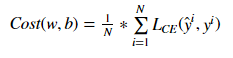

In [5]:
σ(x) = 1/(1+exp(-x))

function cross_entropy_loss(x, y, w, b)
    return -y*log(σ(w'x + b)) -(1-y)*log(1 - σ(w'x+b))
end

function average_loss(features, labels, w, b)
    N = length(features)
    return (1/N)*sum([cross_entropy_loss(features[i], labels[i], w, b) for i = 1:N])
end

average_loss (generic function with 1 method)

## 3. Batch Gradient Descent function

$\frac{\partial L_{CE}(w,b)}{\partial b} = \frac{1}{N} * \sum\limits _{i=1} ^{N} \frac{\partial L_{CE}(w,b, \hat{x}^{i})}{\partial b} $

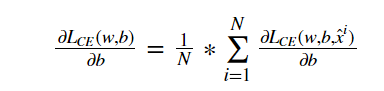

In [6]:
function batch_gradient_descent(features, labels, w, b, α)
    
    del_w = [0.0 for i = 1:length(w)]
    del_b = 0.0
    
    N = length(features)
    
    for i = 1:N
        del_w += (σ(w'features[i]+b) - labels[i])*features[i]
        del_b += (σ(w'features[i]+b) - labels[i])
    end
    
    w = w - α*del_w
    b = b - α*del_b
    
    return w, b
end

batch_gradient_descent (generic function with 1 method)

In [7]:
w = [0.0, 0.0]
b = 0.0
println("The initial cost is: ", average_loss(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, 0.0000001)
println("The new cost is: ", average_loss(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, 0.0000001)
println("The new cost is: ", average_loss(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, 0.0000001)
println("The new cost is: ", average_loss(x_data, y_data, w, b))

w, b = batch_gradient_descent(x_data, y_data, w, b, 0.0000001)
println("The new cost is: ", average_loss(x_data, y_data, w, b))

The initial cost is: 0.6931471805599448
The new cost is: 0.68929742452507
The new cost is: 0.685902148554632
The new cost is: 0.682845301153201
The new cost is: 0.6800414995518517


In [8]:
function train_batch_gradient_descent(features, labels, w, b, α, epochs)
    
    for i = 1:epochs
        
        w, b = batch_gradient_descent(features, labels, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end
        
        if i == 100
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end
        
        if i == 1000
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end        
        
        if i == 10000
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end

        if i == 100000
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end
        
        if i == 1000000
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end
        
        if i == 100000
            println("Epoch ", i, " with loss: ", average_loss(x_data, y_data, w, b))
        end  
    end
    
    return w,b
end

train_batch_gradient_descent (generic function with 1 method)

In [9]:
w = [0.0, 0.0]
b = 0.0

w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.6663716486734741
Epoch 100 with loss: 0.3304944524857512
Epoch 1000 with loss: 0.3082781858351418
Epoch 10000 with loss: 0.3066952740428512
Epoch 100000 with loss: 0.293757141589279
Epoch 100000 with loss: 0.293757141589279


([-0.12446326645856375, 0.19863923078348777], 1.2123632358592102)

In [10]:
w = randn(2)
b = randn(1)[1]

w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: NaN
Epoch 100 with loss: 0.44026001501689976
Epoch 1000 with loss: 0.287222512108937
Epoch 10000 with loss: 0.28640423203607124
Epoch 100000 with loss: 0.2796755545865263
Epoch 100000 with loss: 0.2796755545865263


([-0.1367734667551638, 0.18051984307320526], 2.713377601038628)

In [11]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.279675492180302
Epoch 100 with loss: 0.2796693151527702
Epoch 1000 with loss: 0.27961326815659965
Epoch 10000 with loss: 0.27906333001045586
Epoch 100000 with loss: 0.27448224573627905
Epoch 100000 with loss: 0.27448224573627905


([-0.14326192319833103, 0.17300053648367972], 3.4328939167412384)

In [12]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.2744822029066414
Epoch 100 with loss: 0.2744779635529041
Epoch 1000 with loss: 0.2744394947498569
Epoch 10000 with loss: 0.2740617252972232
Epoch 100000 with loss: 0.2708905627848586
Epoch 100000 with loss: 0.2708905627848586


([-0.1489324445456075, 0.16729043428188786], 4.031337779861745)

In [13]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.2708905329121075
Epoch 100 with loss: 0.27088757603118907
Epoch 1000 with loss: 0.2708607425902135
Epoch 10000 with loss: 0.27059703411499403
Epoch 100000 with loss: 0.26836777989604754
Epoch 100000 with loss: 0.26836777989604754


([-0.1538680679083046, 0.1628671615468941], 4.532943338968981)

In [14]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.2683677587534985
Epoch 100 with loss: 0.26836566599581146
Epoch 1000 with loss: 0.26834667309564014
Epoch 10000 with loss: 0.26815989244620375
Epoch 100000 with loss: 0.2665711351819897
Epoch 100000 with loss: 0.2665711351819897


([-0.15815751892688973, 0.15938002994837308], 4.956287736032649)

In [15]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.26657112002446437
Epoch 100 with loss: 0.26656961967472415
Epoch 1000 with loss: 0.26655600237973576
Epoch 10000 with loss: 0.26642200792426746
Epoch 100000 with loss: 0.26527608970416344
Epoch 100000 with loss: 0.26527608970416344


([-0.1618849515164855, 0.15658868922940739], 5.315738002246925)

In [16]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.2652760787153867
Epoch 100 with loss: 0.26527499099867
Epoch 1000 with loss: 0.2652651182834484
Epoch 10000 with loss: 0.2651679211865382
Epoch 100000 with loss: 0.2643328129928623
Epoch 100000 with loss: 0.2643328129928623


([-0.1651260397063733, 0.1543247758130958], 5.622529837741352)

In [17]:
w, b = train_batch_gradient_descent(x_data, y_data, w, b, 0.000001, 100000)

Epoch 1 with loss: 0.26433280494921957
Epoch 100 with loss: 0.2643320087510649
Epoch 1000 with loss: 0.2643247816967789
Epoch 10000 with loss: 0.2642536000532785
Epoch 100000 with loss: 0.263639555439636
Epoch 100000 with loss: 0.263639555439636


([-0.16794706706386583, 0.15246780826940348], 5.885553512642443)

## 4. Mean error calculation

In [18]:
function predict(x, y, w, b)
    if σ(w'x+b) >= 0.5
        return 1
    else
        return 0       
    end
end

predict (generic function with 1 method)

In [20]:
mean_error = 0.0
for i = 1:length(x_data)
    mean_error += (predict(x_data[i], y_data[i], w, b) - y_data[i])^2
end

println("The average error: ", mean_error/length(x_data))

The average error: 0.098
